# Mnist classification with NNs
A first example of a simple Neural Network, applied to a well known dataset.

In [2]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras import utils
import matplotlib.pyplot as plt
import numpy as np

Let us load the mnist dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


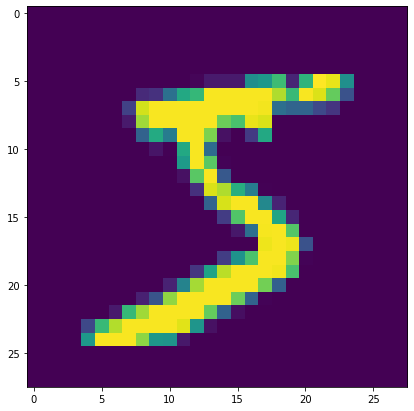

In [4]:
def show(x, title=None):
    plt.figure(figsize=(15, 8))

    plt.subplot(1, 2, 1)
    plt.imshow(x)
    if title:
        plt.title(title[0])
    plt.show()

show(x_train[0])

In [20]:
print(x_train.shape)
print("pixel range is [{},{}]".format(np.min(x_train),np.max(x_train)))

(60000, 28, 28)
pixel range is [0,255]


We normalize the input in the range [0,1]

In [5]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train,(60000,28*28))
x_test = np.reshape(x_test,(10000,28*28))

In [27]:
print(y_train.shape)
print("category range is [{},{}]".format(np.min(y_train),np.max(y_train)))

(60000,)
category range is [0,9]


The output of the network will be a proability distribution over the different categories. Similarly, we generate a ground truth distribution, and the training objective will consist in minimizing their distance (categorical crossentropy). The ground truth distribution is the so called "categorical" distribution: if x has label l, the corresponding categorical distribution has probaility 1 for the category l, and 0 for all the others.

In [6]:
print(y_train[0])
y_train_cat = utils.to_categorical(y_train)
print(y_train_cat[0])
y_test_cat = utils.to_categorical(y_test)

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Our first Netwok just implements logistic regression

In [7]:
xin = Input(shape=(784))
res = Dense(10,activation='softmax')(xin)

mynet = Model(inputs=xin,outputs=res)

In [8]:
mynet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Now we need to compile the network.
In order to do it, we need to pass two mandatory arguments:


*   the **optimizer**, in charge of governing the details of the backpropagation algorithm
*   the **loss function**

Several predefined optimizers exist, and you should just choose your favourite one. A common choice is Adam, implementing an adaptive lerning rate, with momentum

Optionally, we can specify additional metrics, mostly meant for monitoring the training process.


In [9]:
from tensorflow.keras.optimizers import Adam

mynet.compile(optimizer=Adam(learning_rate=1e-3),loss='categorical_crossentropy',metrics=['accuracy'])

Finally, we fit the model over the trianing set. 

Fitting, just requires two arguments: training data e ground truth, that is x and y. Additionally we can specify epochs, batch_size, and many additional arguments.

In particular, passing validation data allow the training procedure to measure loss and metrics on the validation set at the end of each epoch.

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop_cb = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.2,
    patience=2,
    restore_best_weights=True,
)

history = mynet.fit(x_train,y_train_cat, shuffle=True, epochs=10, batch_size=32,validation_split=0.16, callbacks=[early_stop_cb])

Epoch 1/10
1575/1575 [==============================] - 5s 3ms/step - loss: 0.2522 - accuracy: 0.9298 - val_loss: 0.2252 - val_accuracy: 0.9383
Epoch 2/10
1575/1575 [==============================] - 4s 2ms/step - loss: 0.2499 - accuracy: 0.9315 - val_loss: 0.2280 - val_accuracy: 0.9378
Epoch 3/10
1575/1575 [==============================] - 4s 2ms/step - loss: 0.2489 - accuracy: 0.9317 - val_loss: 0.2331 - val_accuracy: 0.9374


In [10]:
# We can also use the history (that we saved before) to check the behavior of the training.
# history is a Python dictionary that cointains the values of the behavior of the loss
# during training (one value for each epoch).
def display_history(history):
    mse_training = history.history['loss']
    acc_training = history.history['accuracy']

    mse_val = history.history['val_loss']
    acc_val = history.history['val_accuracy']

    # Visualize the behavior of the loss
    plt.plot(mse_training)
    plt.plot(mse_val)
    plt.grid()
    plt.title('Loss during training')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'])
    plt.show()

    # and of the accuracy
    plt.plot(acc_training)
    plt.plot(acc_val)
    plt.grid()
    plt.title('Accuracy during training')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'])
    plt.show()

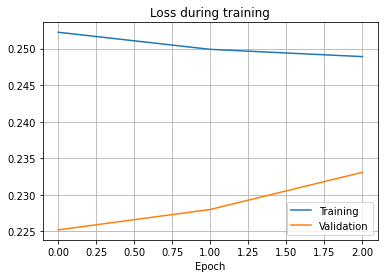

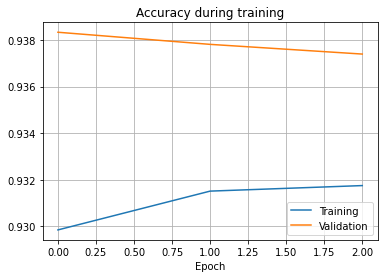

In [38]:
display_history(history)

In [17]:
xin = Input(shape=(784))
x = Dense(128,activation='relu')(xin)
res = Dense(10,activation='softmax')(x)

mynet2 = Model(inputs=xin,outputs=res)

In [18]:
mynet2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [19]:
mynet2.compile(optimizer=Adam(learning_rate=1e-3),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
mynet2.fit(x_train,y_train_cat, shuffle=True, epochs=10, batch_size=32,validation_data=(x_test,y_test_cat))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2554 - accuracy: 0.9267 - val_loss: 0.1371 - val_accuracy: 0.9587
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1099 - accuracy: 0.9669 - val_loss: 0.0951 - val_accuracy: 0.9706
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0756 - accuracy: 0.9770 - val_loss: 0.0831 - val_accuracy: 0.9729
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0571 - accuracy: 0.9826 - val_loss: 0.0776 - val_accuracy: 0.9756
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0438 - accuracy: 0.9860 - val_loss: 0.0718 - val_accuracy: 0.9776
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0351 - accuracy: 0.9891 - val_loss: 0.0673 - val_accuracy: 0.9804
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0281 - accuracy: 0.9907 - val_loss: 0.0734 - val_accuracy:

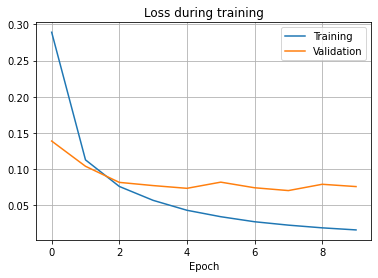

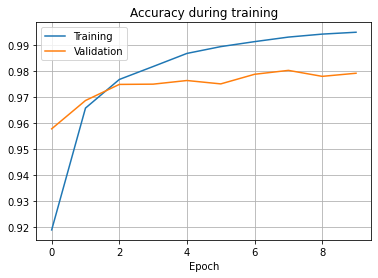

In [21]:
display_history(history)

An amazing improvement. WOW!

# Exercises

1.   Add additional Dense layers and check the performance of the network
2.   Replace 'relu' with different activation functions
3. Adapt the network to work with the so called sparse_categorical_crossentropy
4. the fit function return a history of training, with temporal sequences for all different metrics. Make a plot.



**Add additional Dense layers and check the performance of the network**


In [49]:
xin = Input(shape=(784))
dense_1 = Dense(128,activation='relu')(xin)
dense_2 = Dense(256,activation='relu')(dense_1)
dense_3 = Dense(128,activation='relu')(dense_2)
res = Dense(10,activation='softmax')(dense_3)

model_relu = Model(inputs=xin,outputs=res)
model_relu.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_37 (Dense)            (None, 128)               100480    
                                                                 
 dense_38 (Dense)            (None, 256)               33024     
                                                                 
 dense_39 (Dense)            (None, 128)               32896     
                                                                 
 dense_40 (Dense)            (None, 10)                1290      
                                                                 
Total params: 167,690
Trainable params: 167,690
Non-trainable params: 0
_________________________________________________________________


In [50]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop_cb = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.1,
    patience=3,
    restore_best_weights=True,
)

model_relu.compile(optimizer=Adam(learning_rate=1e-3),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model_relu.fit(x_train,y_train, shuffle=True, epochs=10, batch_size=32,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2217 - accuracy: 0.9322 - val_loss: 0.1106 - val_accuracy: 0.9647
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0987 - accuracy: 0.9696 - val_loss: 0.0990 - val_accuracy: 0.9692
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0697 - accuracy: 0.9780 - val_loss: 0.0837 - val_accuracy: 0.9759
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0558 - accuracy: 0.9821 - val_loss: 0.0836 - val_accuracy: 0.9774
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0451 - accuracy: 0.9855 - val_loss: 0.0850 - val_accuracy: 0.9754
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0399 - accuracy: 0.9880 - val_loss: 0.0818 - val_accuracy: 0.9770
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0318 - accuracy: 0.9898 - val_loss: 0.1059 - val_accuracy:

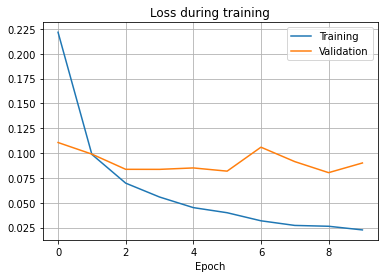

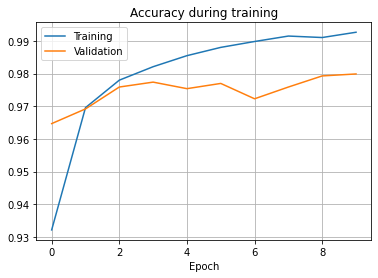

In [51]:
display_history(history)